In [ ]:
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt
from pydeseq2.preprocessing import deseq2_norm
import custom_func as pc

### OPEN ANNDATA FILE

In [2]:
path = '/Users/maksimsgolubovics/Studienprojekt/Studienprojekt/Study Project/mouse_liver'
adata = ad.read_h5ad(path)

### PYDESEQ2 NORMALIZATION ON RAW COUNTS

In [3]:
adata.layers['deseq2_norm'] = deseq2_norm(adata.layers['not_normalized'])[0]

### LOGARITHMIC TRANSFORMATION

In [4]:
#Adding log10 transformed data
adata.layers['log_trasformed'] = np.log10(adata.X + 0.1)
adata.layers['log_trasformed_deseq2'] = np.log10(adata.layers['deseq2_norm'] + 1)

### REDUCING THE FEATURE SPACE BASED ON THE MEAN AND STD

In [5]:
'''Back to DataFrame'''
adataX_df = adata.to_df(layer='log_trasformed')

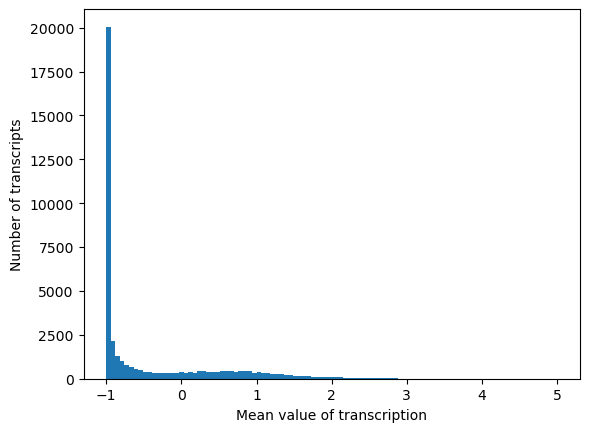

In [6]:
'''Mean transcript count'''
bins = np.linspace(-1, 5, 100);
plt.xlabel("Mean value of transcription")
plt.ylabel("Number of transcripts")
plt.hist(adataX_df.mean(), bins=bins);

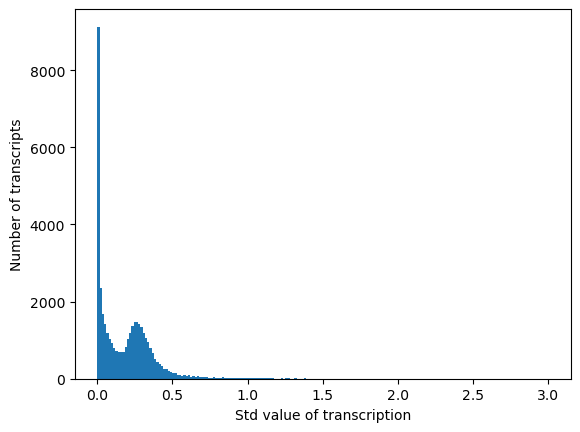

In [7]:
bins = np.linspace(0, 3, 200);
plt.xlabel("Std value of transcription")
plt.ylabel("Number of transcripts")
plt.hist(adataX_df.std(), bins=bins);

In [8]:
'''Reduce by mean'''
adataX_df_mean = adataX_df.T[adataX_df.mean()>-0.50].T

In [9]:
'''Reduce by std'''
adataX_df_mean_std_1 = adataX_df_mean.T[adataX_df_mean.std()>0.22].T

In [10]:
'''Adding obsm to anndata'''
adata.obsm['small_reduction'] = adataX_df_mean_std_1 # 12352 transcripts

### REMOVING BATCHEFFECT

In [11]:
'''Residual values after centering around study'''
x_0=pc.residual_dummy(data=adata.obsm['small_reduction'], data_dummy_1=adata.obs['study'], columns='study')
x_1=pc.residual_dummy(data=adata.layers['log_trasformed'], data_dummy_1=adata.obs['study'], columns='study')
x_2=pc.residual_dummy(data=adata.layers['log_trasformed_deseq2'], data_dummy_1=adata.obs['study'], columns='study')

In [14]:
'''Saving centered values to AnnData'''
adata.obsm['centered_study_log_small'] = x_0
adata.layers['centered_study_log_full'] = x_1
adata.layers['centered_study_log_full_pydeseq2'] = x_2

In [21]:
adata

AnnData object with n_obs × n_vars = 1096 × 40614
    obs: 'study', 'time', 'outlier', 'Sex', 'Light', 'Age (weeks)', 'Sequencing Type', 'Inferred Sequencing Type', 'Note'
    var: 'Symbol'
    obsm: 'small_reduction', 'centered_study_log_small'
    layers: 'not_normalized', 'deseq2_norm', 'log_trasformed', 'log_trasformed_deseq2', 'centered_study_log_full', 'centered_study_log_full_pydeseq2'

In [16]:
'''Save anndata object'''
adata.write('/Users/maksimsgolubovics/Studienprojekt/Studienprojekt/Study Project/mouse_liver', compression='gzip')